## Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv("AmesHousing.tsv", delimiter='\t')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Helper functions

In [3]:
def transform_features(df):
    return df

def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    # numeric features
    features = numeric_train.columns.drop('SalePrice')
    target = 'SalePrice'
    
    lr = LinearRegression()
    lr.fit(train[features], train[target])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

####################################################
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

57088.251612639084

## Feature Engineering

- Handle missing values:
    - All columns:
        - Drop any with 5% or more missing values **for now**
    - Text columns:
        - Drop any with 1 or more missing values ** for now**
    - Numericla columns:
        - For columns with missing vlaues, fill in with the most common values in that colum

In [4]:
# Number of missing values in each column
num_missing = df.isnull().sum()
num_missing

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

1: All columns: Drop any with 5% or more missing values for now

In [5]:
# Filter Series to columns containing > 5% missing values
drop_missing_cols = num_missing[num_missing > len(df)/20].index
# print(drop_missing_cols)
df = df.drop(drop_missing_cols, axis=1)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


2: Text columns: Drop any with 1 or more missing values for now

In [6]:
## count missing values in each text column
text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
# print(text_mv_counts)

## Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts != 0].index
# print(drop_missing_cols_2)

## drop columns
df = df.drop(drop_missing_cols_2, axis=1)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


3: Numerical columns: For columns with missing vlaues, fill in with the most common values in that colum

In [7]:
## Count missing values in each numeric columns
num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
# print(num_missing)

fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
print(fixable_numeric_cols)

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64


In [8]:
## Compute the most common value for each column in 'fixable_numeric_cols'.
replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [9]:
## Filling in missing slots
df = df.fillna(replacement_values_dict)

## Verify that every column has 0 missing values
df.isnull().sum().value_counts()

0    64
dtype: int64

- What new features can we create, that better capture the information in some of the features?

In [10]:
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [11]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [12]:
## Create new columns
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
try:
    df = df.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns (no meaningful)
    df = df.drop(['Year Built', 'Year Remod/Add'], axis=1)
except Exception:
    pass

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 64 columns):
Order                2927 non-null int64
PID                  2927 non-null int64
MS SubClass          2927 non-null int64
MS Zoning            2927 non-null object
Lot Area             2927 non-null int64
Street               2927 non-null object
Lot Shape            2927 non-null object
Land Contour         2927 non-null object
Utilities            2927 non-null object
Lot Config           2927 non-null object
Land Slope           2927 non-null object
Neighborhood         2927 non-null object
Condition 1          2927 non-null object
Condition 2          2927 non-null object
Bldg Type            2927 non-null object
House Style          2927 non-null object
Overall Qual         2927 non-null int64
Overall Cond         2927 non-null int64
Roof Style           2927 non-null object
Roof Matl            2927 non-null object
Exterior 1st         2927 non-null object
Exterior 2nd     

### Drop columns:

   - that are not useful for ML
   - leak data about the final sale, reference [here.](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt) 

In [13]:
## Drop columns that aren't useful for ML## Drop c 
df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

## Update transform_features( )

In [14]:
def transform_features(df):
## 1: All columns: Drop any with 5% or more missing values
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[num_missing > len(df)/20].index
    df = df.drop(drop_missing_cols, axis=1)

## 2: Text columns: Drop any with 1 or more missing values
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts != 0].index
    df = df.drop(drop_missing_cols_2, axis=1)

## 3: Numerical columns: fill in with the most common values in that colum
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
## Adding meaningful features and drop the opposites
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    try:
        df = df.drop([1702, 2180, 2181], axis=0)
        df = df.drop(["Year Built", "Year Remod/Add", \
                      "PID", "Order", "Mo Sold", \
                      "Sale Condition", "Sale Type", \
                      "Yr Sold"], axis=1)
    except Exception:
        pass
    
    return df

####################################################
df = pd.read_csv("AmesHousing.tsv", delimiter='\t')
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse


55275.367312413066

## Feature Selection

- Study correlation through heatmap matrix of numericla features in the training data set
    - which features corrleate strongly with the target column, 'SalePrice'?
    - look for potential collinearlity
    - removing features with low variance
- Study columns that are **meant** to be categorical
    - Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?
    - If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the data frame.

1: Study correlation

a: remove low correlation with the target & high collinearity features

In [15]:
## Only numerical features
numerical_df = transform_df.select_dtypes(include=['int', 'float'])

# numerical_df.dtypes

In [16]:
## We want correlation with the target, 'SalePrice'
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()

# abs_corr_coeffs

In [17]:
## Let's only keep columns with a strong correlation with 'SalePrice', that is, of which corr. coeff is larger than 0.4
strong_corrs = abs_corr_coeffs[abs_corr_coeffs > .4]

strong_corrs

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [18]:
## Drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

In [19]:
import seaborn as sns
train_df = transform_df[:1460]
corrmat = train_df[strong_corrs.index].corr()

cols = corrmat.index.drop('SalePrice').values
print("High collinearity")
for col in cols:
    l = corrmat[corrmat[corrmat >.7][col].notnull()][corrmat.index.values[0]].index.tolist()
    l.remove(col)
    if (len(l) != 0) and ('SalePrice' not in l):
        print(col, ":", l)

High collinearity
TotRms AbvGrd : ['Gr Liv Area']
1st Flr SF : ['Total Bsmt SF']
Garage Area : ['Garage Cars']
Total Bsmt SF : ['1st Flr SF']
Garage Cars : ['Garage Area']
Gr Liv Area : ['TotRms AbvGrd']


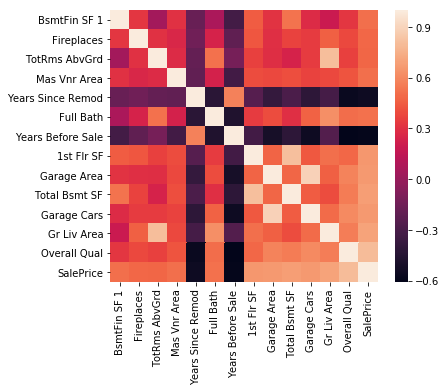

In [20]:
plt.figure(figsize=(6,5))
sns.heatmap(corrmat)
plt.show()

- Following pairs of columns are strongly correlated:
    1. 'Gr Liv Area' & 'TotRms AbvGrd'
    2. 'Garage Area' & 'Garage Cars'
    3. 'Total Bsmt Sf' & '1st Flr SF'

In [21]:
## Drop highly correlated columns (don't need both columns)
final_corr_cols = strong_corrs.drop(['TotRms AbvGrd', 'Garage Cars', '1st Flr SF']).index

final_corr_cols

Index(['BsmtFin SF 1', 'Fireplaces', 'Mas Vnr Area', 'Years Since Remod',
       'Full Bath', 'Years Before Sale', 'Garage Area', 'Total Bsmt SF',
       'Gr Liv Area', 'Overall Qual', 'SalePrice'],
      dtype='object')

In [22]:
transform_df = transform_df.drop(['TotRms AbvGrd', 'Garage Cars', '1st Flr SF'], axis=1)

transform_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Gr Liv Area,Full Bath,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,1656,1,TA,Typ,2,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,896,1,TA,Typ,0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,1329,1,Gd,Typ,0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,2110,2,Ex,Typ,2,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,1629,2,TA,Typ,1,482.0,Y,189900,13,12


b: removing features with low variance

In [23]:
## Check variance of numerical columns
unit_train = (train_df[final_corr_cols] - train_df[final_corr_cols].min()) / (train_df[final_corr_cols].max() - train_df[final_corr_cols].min())
sorted_vars = unit_train.var().sort_values()

sorted_vars

SalePrice            0.016941
Total Bsmt SF        0.017903
Mas Vnr Area         0.018348
Full Bath            0.018621
Garage Area          0.020347
Gr Liv Area          0.023078
Overall Qual         0.024496
BsmtFin SF 1         0.037603
Fireplaces           0.046589
Years Before Sale    0.049898
Years Since Remod    0.120670
dtype: float64

In [24]:
## decide which columns need dropping
drop_cols = sorted_vars[sorted_vars < .02].index
final_corr_cols = final_corr_cols.drop(drop_cols) # meaningful numerical column names
transform_df = transform_df.drop(drop_cols, axis=1)

transform_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Heating QC,Central Air,Gr Liv Area,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Fa,Y,1656,TA,Typ,2,528.0,P,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Y,896,TA,Typ,0,730.0,Y,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,Y,1329,Gd,Typ,0,312.0,Y,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Ex,Y,2110,Ex,Typ,2,522.0,Y,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Y,1629,TA,Typ,1,482.0,Y,13,12


2: Study columns that are meant to be categorical
- 
Which categorical columns should we keep?

In [25]:
## Create a list of column names *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [26]:
## Which categorical columns have we still carried with us? 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

## How many unique values in eqch categorical column?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
print(uniqueness_counts)

## Arbitrary cutoff of 10 unique values
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

transform_df.head()

Street           2
Central Air      2
Land Contour     4
Lot Config       5
Bldg Type        5
Roof Style       6
Foundation       6
Heating          6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
Exterior 2nd    17
Neighborhood    28
dtype: int64


,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,...,Heating QC,Central Air,Gr Liv Area,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,Fa,Y,1656,TA,Typ,2,528.0,P,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,...,TA,Y,896,TA,Typ,0,730.0,Y,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,TA,Y,1329,Gd,Typ,0,312.0,Y,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,Ex,Y,2110,Ex,Typ,2,522.0,Y,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,Gd,Y,1629,TA,Typ,1,482.0,Y,13,12


In [27]:
## Select the remaing columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object']).columns
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')

## Create dummy collumns and add to the dataframe and remove the original
transform_df = pd.concat([
    transform_df,
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)
transform_df = transform_df.drop(text_cols, axis=1)
print('SalePrice' in transform_df.columns)

False


### Update select_features( )

In [28]:
def select_features(df, coeff_threshold=0.4, var_threshold = 0.02, uniq_threshold=10):
## 1: correlation
## a: remove low correlation with the target & high collinearity features    
    saleprice = df['SalePrice']
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    strong_corrs = abs_corr_coeffs[abs_corr_coeffs > coeff_threshold]
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    final_corr_cols = strong_corrs.drop(['TotRms AbvGrd', 'Garage Cars', '1st Flr SF']).index # need to be return
    df = df.drop(['TotRms AbvGrd', 'Garage Cars', '1st Flr SF'], axis=1)
    
## b: removing features with low variance
    ## for operational and compatibility reason, we locate this part in test_and_train
#     train_df = df[:1460]
#     unit_train = (train_df[final_corr_cols] - train_df[final_corr_cols].min()) / (train_df[final_corr_cols].max() - train_df[final_corr_cols].min())
#     sorted_vars = unit_train.var().sort_values()
    
#     drop_cols = sorted_vars[sorted_vars < var_threshold].index
#     final_corr_cols = final_corr_cols.drop(drop_cols) # meaningful numerical column names
#     df = df.drop(drop_cols, axis=1)

    
## 2: Columns that are meant to be categorical
## remove too many unique values
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > uniq_threshold].index
    df = df.drop(drop_nonuniq_cols, axis=1)

    text_cols = df.select_dtypes(include=['object']).columns
    for col in text_cols:
        df[col] = df[col].astype('category')

    ## Create dummy collumns and add to the dataframe and remove the original
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    df = df.drop(text_cols, axis=1)
    
    if 'SalePrice' not in df.columns:
        df = pd.concat([df, saleprice], axis=1)
    
    return (df, final_corr_cols.values, var_threshold)

####################################################
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df, *arg = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

33504.7935932031

## Finalize train_and_test( )

In [29]:
def train_and_test(df, final_corr_cols, var_threshold=0.02, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = LinearRegression()
    for col in final_corr_cols:
        if col not in numeric_df.columns:
            final_corr_cols.remove(col) 
            
    if k == 0:
        train = df[:1460]
        test = df[1460:]
    
    ## select_features() part: b: removing features with low variance
        unit_train = (train[final_corr_cols] - train[final_corr_cols].min()) / (train[final_corr_cols].max() - train[final_corr_cols].min())
        sorted_vars = unit_train.var().sort_values()
        drop_cols = sorted_vars[sorted_vars < var_threshold].index
        df = df.drop(drop_cols, axis=1)
    #####
        
        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = shuffled_df[:1460]
        test = shuffled_df[1460:]
        
    ## select_features() part: b: removing features with low variance
        unit_train = (train[final_corr_cols] - train[final_corr_cols].min()) / (train[final_corr_cols].max() - train[final_corr_cols].min())
        sorted_vars = unit_train.var().sort_values()
        drop_cols = sorted_vars[sorted_vars < var_threshold].index
        df = df.drop(drop_cols, axis=1)
    ##### 
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]        
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

####################################################
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df, *arg = select_features(transform_df)

rmse_1 = train_and_test(filtered_df, *arg, k=10)
print(rmse_1)
print()

rmse_2 = train_and_test(filtered_df, *arg, k=1)
print(rmse_2)
print()

rmse_3 = train_and_test(filtered_df, *arg)
print(rmse_3)

[28219.559158839857, 23220.00834218446, 20644.217783034946, 28073.610728767555, 31521.841570701148, 47618.610782093194, 26799.627314332716, 25944.07281495991, 26480.46340230154, 25264.01632796244]
28378.60282251778

27681.528336078558
32751.649924696372
30216.589130387467

33504.79359320334
